# Import Necessary libraries

In [35]:
import pandas as pd
import numpy as np
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import cohen_kappa_score

# Loading and cleaning the dataset

In [36]:
newdf = pd.DataFrame(pd.read_csv("DataFinal.csv"))
del newdf[newdf.columns[0]]

In [37]:
newdf = newdf.dropna()

In [38]:
#Converting popularity and score to percentage
newdf['popularity'] = (newdf['popularity']*100).astype(int)
newdf['score'] = (newdf['score']*100).astype(int)

In [39]:
#Backing up
data = newdf
data.columns

Index([u'short_title', u'popularity', u'score', u'Venue_id', u'latitude_e',
       u'longitude_e', u'Venue_name', u'average_price', u'highest_price',
       u'listing_count', u'lowest_price', u'lowest_price_good_deals', u'type',
       u'type2', u'Weekday_e', u'TaxiCount', u'LocationID', u'latitude',
       u'longitude', u'Weekday', u'Month', u'DayofMonth', u'Hour', u'Temp_Avg',
       u'Conditions', u'Conditions2', u'timestamp'],
      dtype='object')

# Creating Training and Testing datasets

In [62]:
X = data[['popularity','score','Venue_id','average_price','highest_price','lowest_price','listing_count','lowest_price_good_deals','type2','Temp_Avg','Conditions2','LocationID','Weekday','Month','DayofMonth','Hour']].astype(int)
Y = data['TaxiCount']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.95)

# Creating the model

In [63]:
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
clf2 = RandomForestClassifier(n_estimators= 1000)
clf2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
clf3 = LogisticRegression()
clf3.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)
pred3 = clf3.predict(X_test)

# Results after prediction

In [67]:
actual_values = Y_test.reset_index()
del actual_values['index']
total = actual_values.shape[0]

In [68]:
t1 = 0
t2 = 0
t3 = 0

for i in range(len(pred1)):
    if(abs(pred1[i] - actual_values['TaxiCount'][i])) <= 10:
        t1 = t1 + 1
    if(abs(pred2[i] - actual_values['TaxiCount'][i])) <= 10:
        t2 = t2 + 1
    if(abs(pred3[i] - actual_values['TaxiCount'][i])) <= 10:
        t3 = t3 + 1
print ("DecisionTreeClassifier",t1, "Total", total)
print ("RandomForestClassifier",t2, "Total", total)
print ("LogisticRegression",t3, "Total", total)

('DecisionTreeClassifier', 33, 'Total', 49)
('RandomForestClassifier', 41, 'Total', 49)
('LogisticRegression', 20, 'Total', 49)


In [69]:
cohen_kappa_score(pred2, actual_values)

0.62515937101572461

# Enhancing the model using Grid Search CV

In [70]:
rfc = RandomForestClassifier(n_jobs=-1,max_features='auto',n_estimators=1000, oob_score = True) 

param_grid = { 
    'n_estimators': [100, 2000],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc,scoring='accuracy',param_grid=param_grid, cv=5)
CV_rfc.fit(X_train,Y_train)
print CV_rfc.best_params_
print '\n',CV_rfc.best_estimator_

{'max_features': 'sqrt', 'n_estimators': 2000}

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


In [71]:
lr = LogisticRegression()
lr_param_grid = {'C':[0.001,0.01,0.1,1,10,1000]}

#param_grid = dict(solver = solver_options, multi_class = multi_class_options, class_weight = class_weight_options)
CV_lr = GridSearchCV(lr, lr_param_grid, cv = 5, scoring = 'accuracy')
CV_lr.fit(X_train, Y_train)
print CV_lr.best_params_
print '\n',CV_lr.best_estimator_

{'C': 1}

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


# Creating the model using optimal parameters

In [80]:
rfc_cv = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
rfc_cv.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [77]:
lr_cv = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lr_cv.fit(X_train, Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
rfc_pred = rfc_cv.predict(X_test)
lr_pred = lr_cv.predict(X_test)

In [82]:
tlr = 0
trfc = 0
for i in range(len(rfc_pred)):
    if(abs(rfc_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        trfc = trfc + 1
    if(abs(lr_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        tlr = tlr + 1

print(trfc, tlr)

(41, 20)


# Comparison of Actual vs Predicted Values

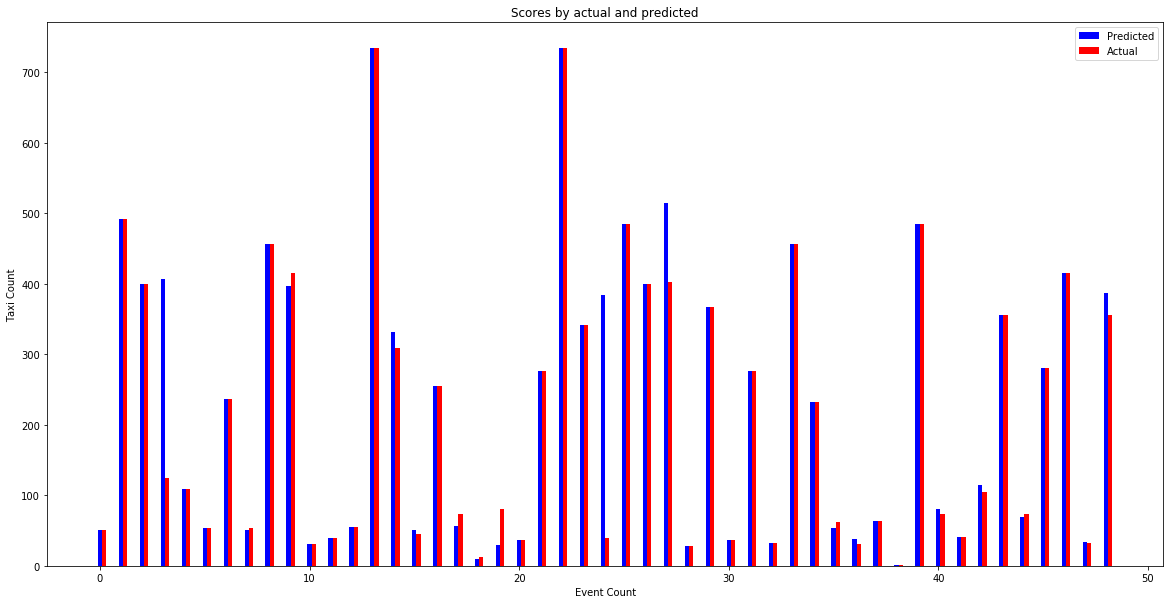

In [113]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 49

means_men = rfc_pred

means_women = actual_values['TaxiCount']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
rects1 = plt.bar(index, means_men, bar_width, 
                 color='b',
                 label='Predicted')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 color='r',
                 label='Actual')

plt.xlabel('Event Count')
plt.ylabel('Taxi Count')
plt.title('Scores by actual and predicted')
plt.legend()
plt.rcParams["figure.figsize"] = (20, 20)
plt.show(fig)

In [84]:
rfc_cv.feature_importances_

array([ 0.03570717,  0.05551079,  0.04459501,  0.06651273,  0.04577382,
        0.05238114,  0.06072482,  0.04638862,  0.02181075,  0.13402257,
        0.04892909,  0.08146114,  0.06644532,  0.05321552,  0.10432688,
        0.08219462])

In [85]:
n_groups1 = len(rfc_cv.feature_importances_)

In [86]:
values = rfc_cv.feature_importances_

In [87]:
index1 = ['popularity','score','Venue_id','average_price','highest_price','lowest_price','listing_count','lowest_price_good_deals','type2','Temp_Avg','Conditions2','LocationID','Weekday','Month','DayofMonth','Hour']

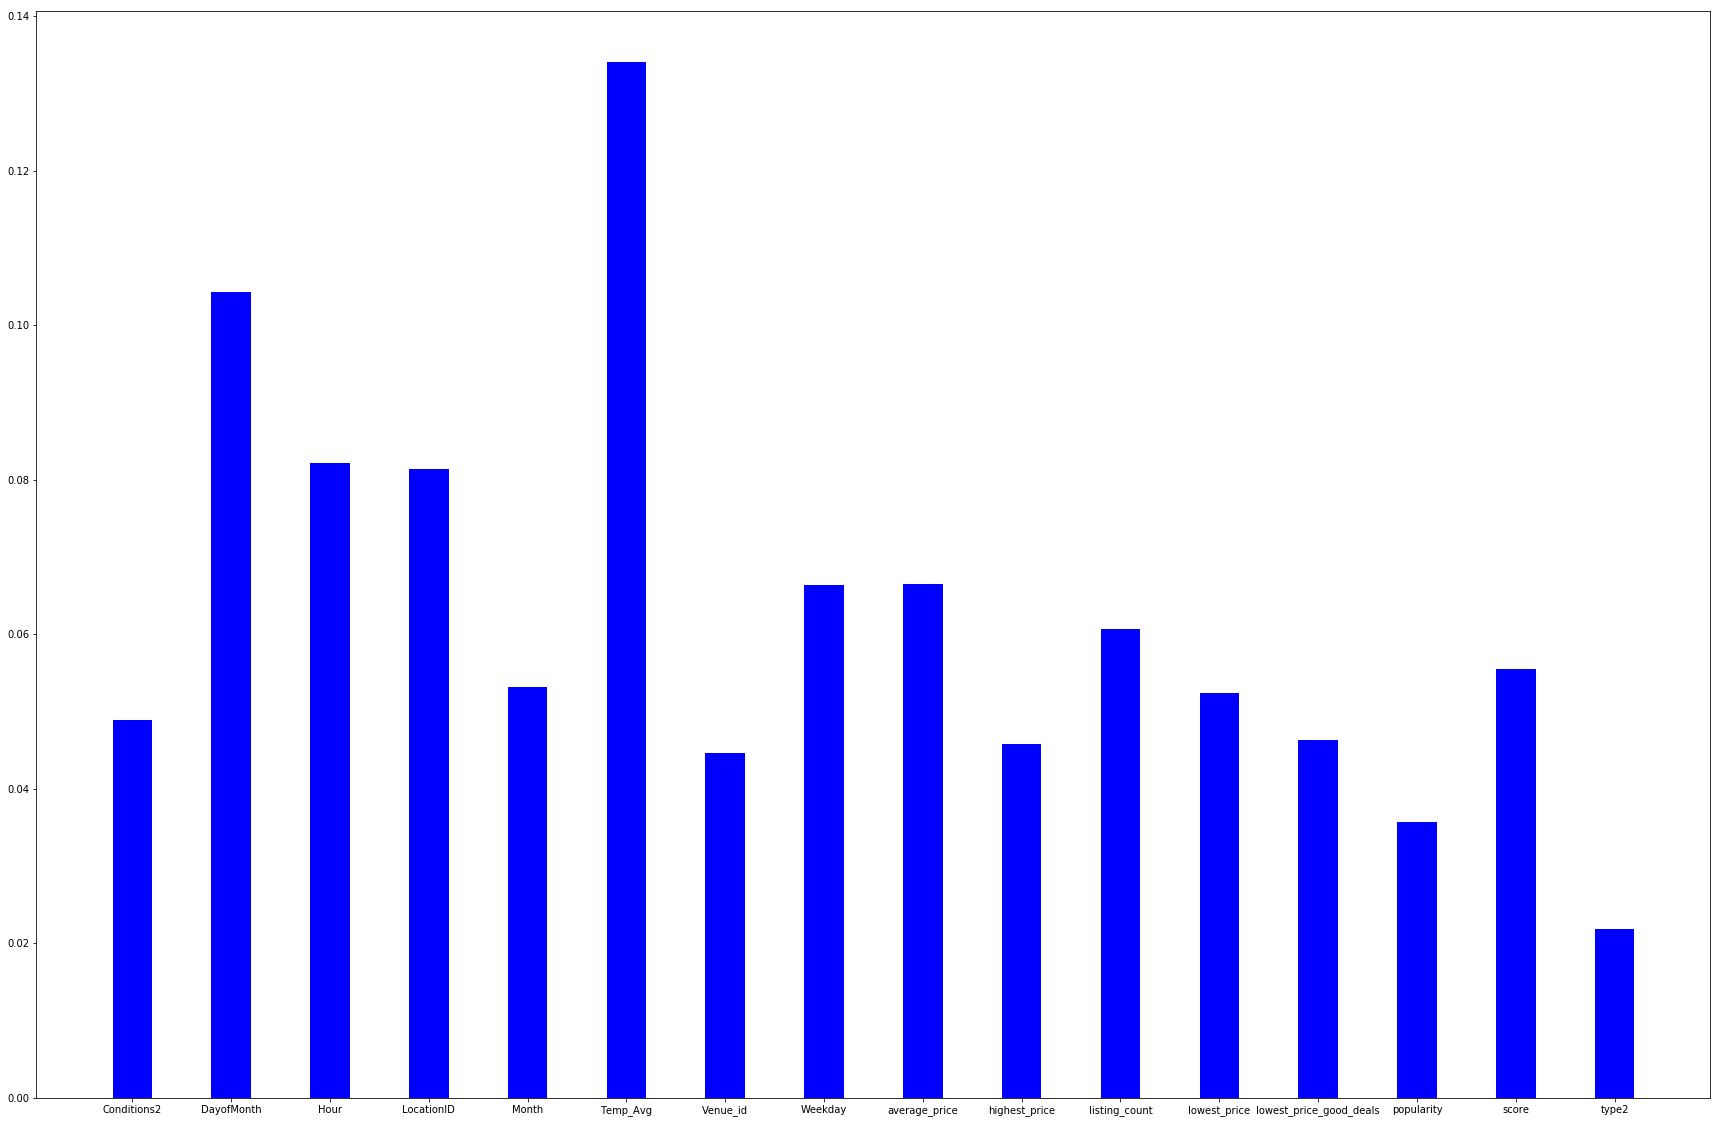

In [107]:
bar_width = 0.4
fig, ax = plt.subplots()
opacity = 0.4
rects3 = plt.bar(index1, values, bar_width, 
                 color='b',
                 label='Feature Importance')
plt.show(fig)
plt.rcParams["figure.figsize"] = (30, 10)